# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже: 

__Оценка:__ 10 (не считая штрафа)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

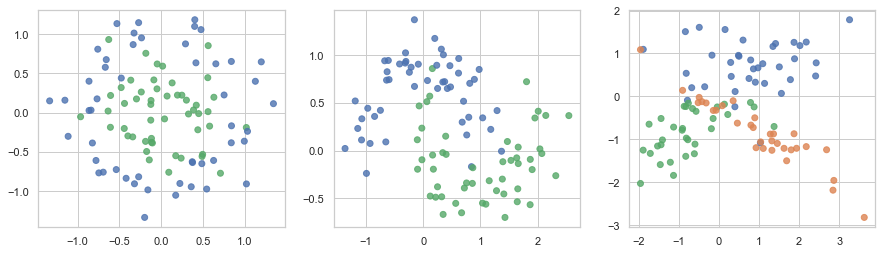

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

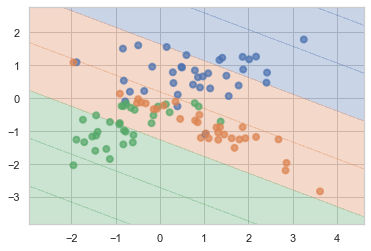

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

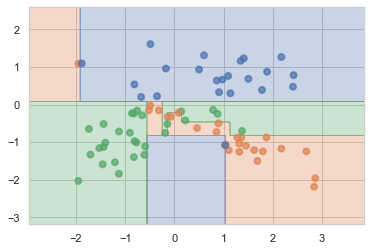

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
plot_surface(tree, X_train, y_train)

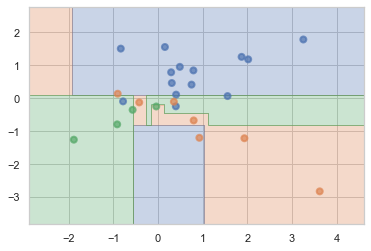

In [20]:
plot_surface(tree, X_test, y_test)

In [15]:
from sklearn.metrics import accuracy_score

print(f'Accuracy на тренировочной выборке: {accuracy_score(tree.predict(X_train), y_train)}, accuracy на тестовой выборке: {accuracy_score(y_test, tree_pred)}')

Accuracy на тренировочной выборке: 1.0, accuracy на тестовой выборке: 0.72


__Ответ:__ деревья сильно переобучились, на тренировочной выборке для всех объектов выдаётся правильный результат, чего нельзя сказать о тестовой выборке

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Accuracy = 0.94, max_depth = 5, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 5, min_samples_leaf = 6
Accuracy = 0.9, max_depth = 5, min_samples_leaf = 10
Accuracy = 0.9, max_depth = 10, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 10, min_samples_leaf = 6
Accuracy = 0.9, max_depth = 10, min_samples_leaf = 10
Accuracy = 0.94, max_depth = 20, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 20, min_samples_leaf = 6
Accuracy = 0.9, max_depth = 20, min_samples_leaf = 10


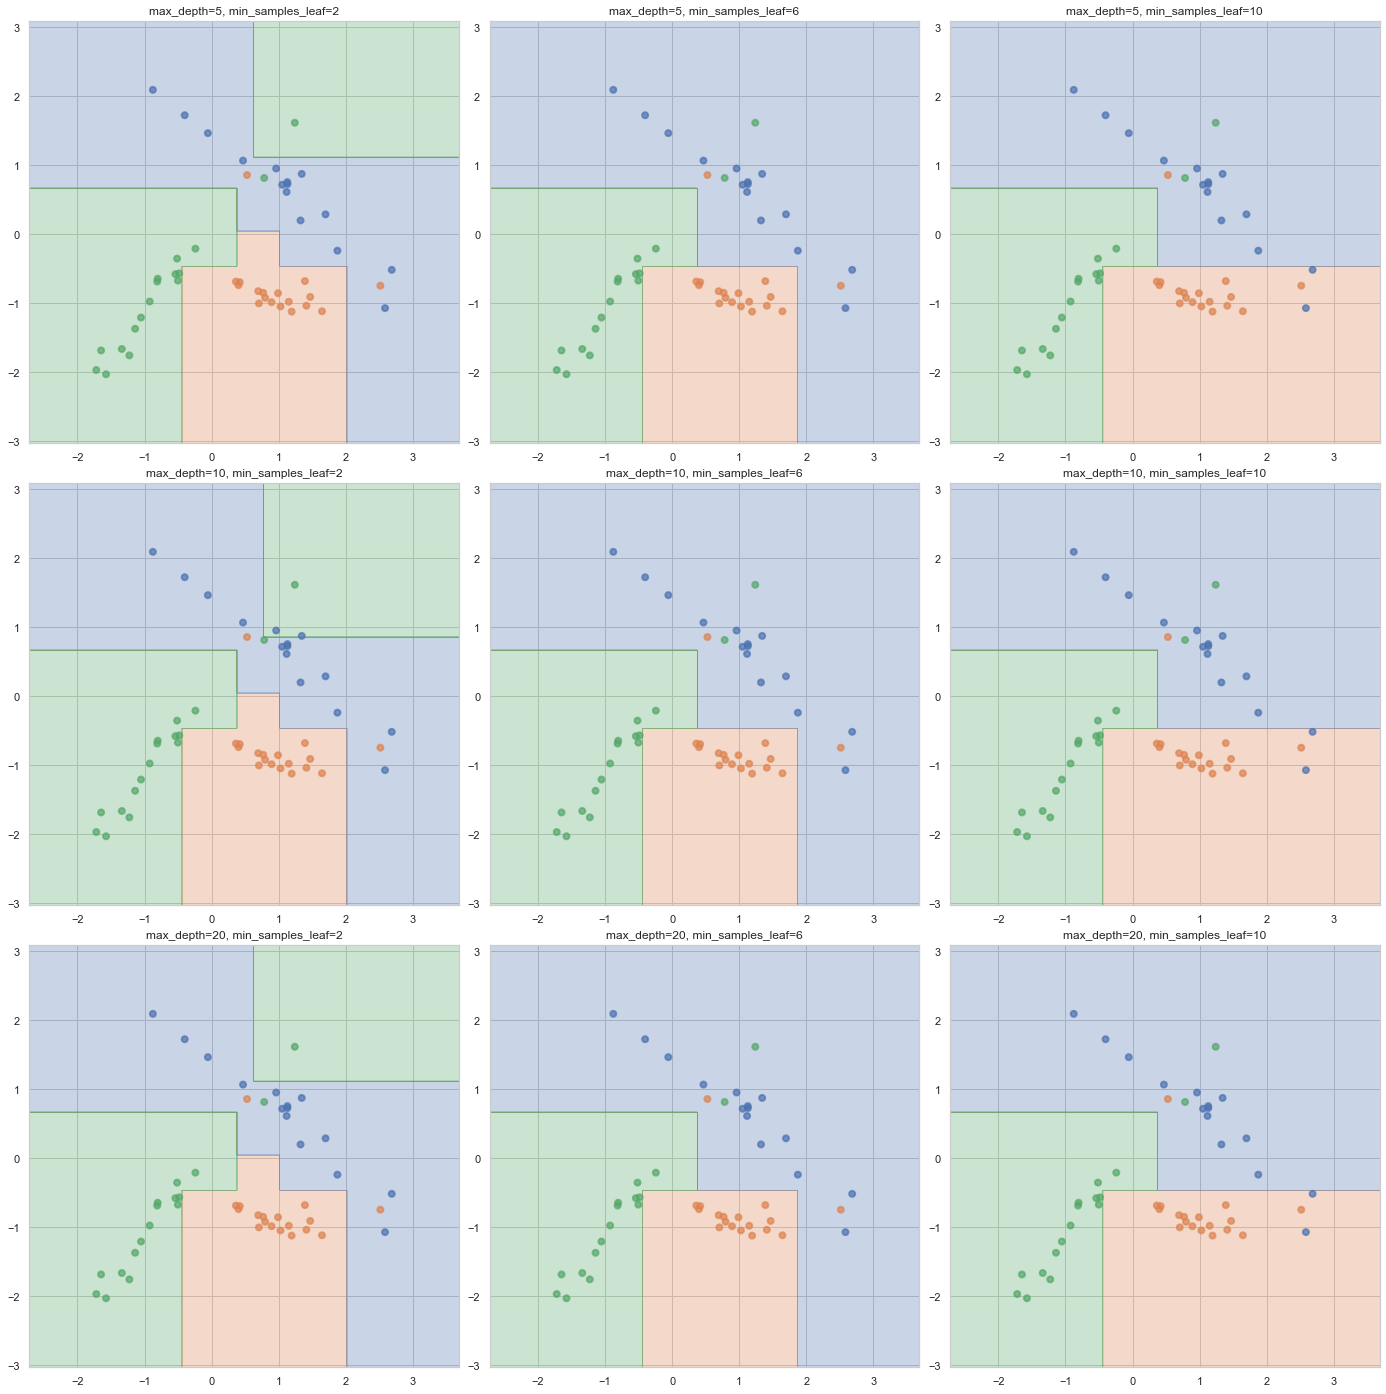

In [26]:
# для обычных кластеров из make_classification
def plot_surface_modified(clf, X, y, ax, depth, leaf):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    ax.set_title(f'max_depth={depth}, min_samples_leaf={leaf}')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)


from sklearn.model_selection import GridSearchCV

depths = [5, 10, 20]
leaves = [2, 6, 10]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
X, y = make_classification(n_samples=200, n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for i, depth in enumerate(depths):
    for j, leaf in enumerate(leaves):
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f'Accuracy = {accuracy_score(pred, y_test)}, max_depth = {depth}, min_samples_leaf = {leaf}')
        plot_surface_modified(clf, X_test, y_test, axs[i][j], depth, leaf)

Accuracy = 0.96, max_depth = 5, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 5, min_samples_leaf = 6
Accuracy = 0.86, max_depth = 5, min_samples_leaf = 10
Accuracy = 0.96, max_depth = 10, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 10, min_samples_leaf = 6
Accuracy = 0.86, max_depth = 10, min_samples_leaf = 10
Accuracy = 0.96, max_depth = 20, min_samples_leaf = 2
Accuracy = 0.92, max_depth = 20, min_samples_leaf = 6
Accuracy = 0.86, max_depth = 20, min_samples_leaf = 10


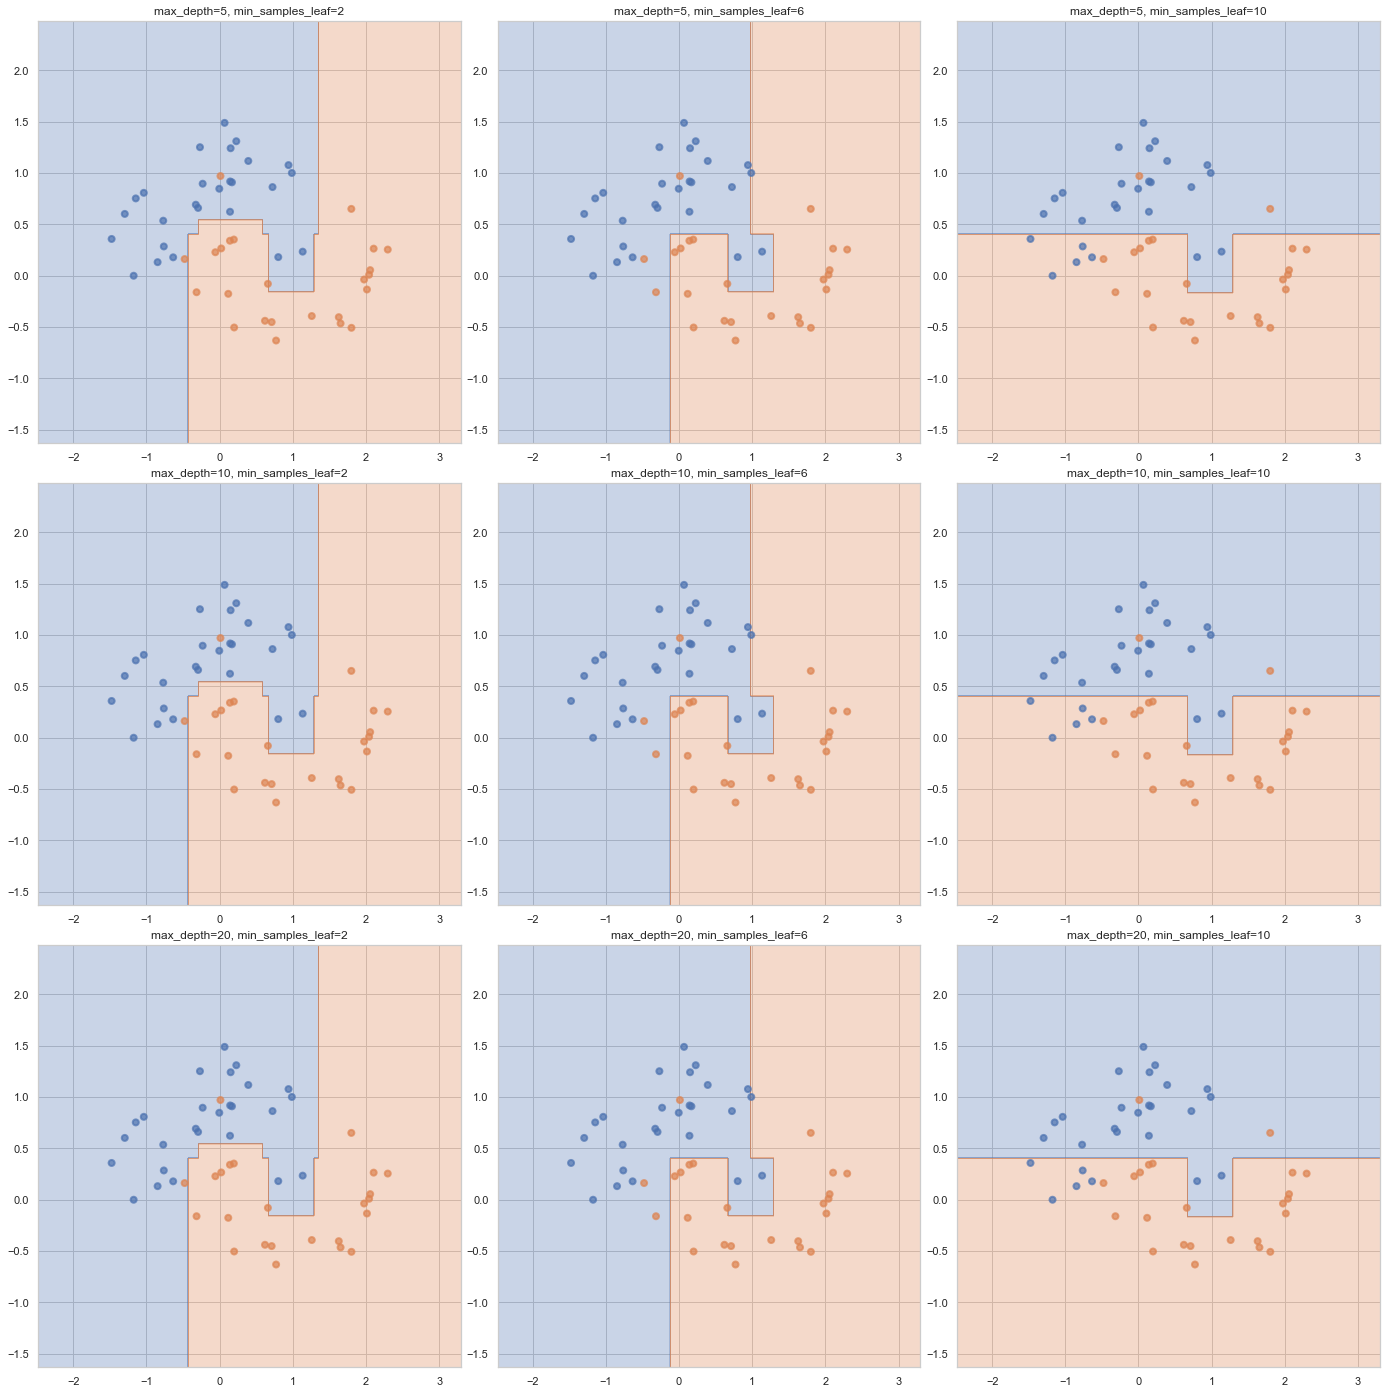

In [27]:
# для moons
def plot_surface_modified(clf, X, y, ax, depth, leaf):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    ax.set_title(f'max_depth={depth}, min_samples_leaf={leaf}')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)


from sklearn.model_selection import GridSearchCV

depths = [5, 10, 20]
leaves = [2, 6, 10]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for i, depth in enumerate(depths):
    for j, leaf in enumerate(leaves):
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f'Accuracy = {accuracy_score(pred, y_test)}, max_depth = {depth}, min_samples_leaf = {leaf}')
        plot_surface_modified(clf, X_test, y_test, axs[i][j], depth, leaf)

Accuracy = 0.84, max_depth = 5, min_samples_leaf = 2
Accuracy = 0.84, max_depth = 5, min_samples_leaf = 6
Accuracy = 0.84, max_depth = 5, min_samples_leaf = 10
Accuracy = 0.86, max_depth = 10, min_samples_leaf = 2
Accuracy = 0.84, max_depth = 10, min_samples_leaf = 6
Accuracy = 0.84, max_depth = 10, min_samples_leaf = 10
Accuracy = 0.86, max_depth = 20, min_samples_leaf = 2
Accuracy = 0.84, max_depth = 20, min_samples_leaf = 6
Accuracy = 0.84, max_depth = 20, min_samples_leaf = 10


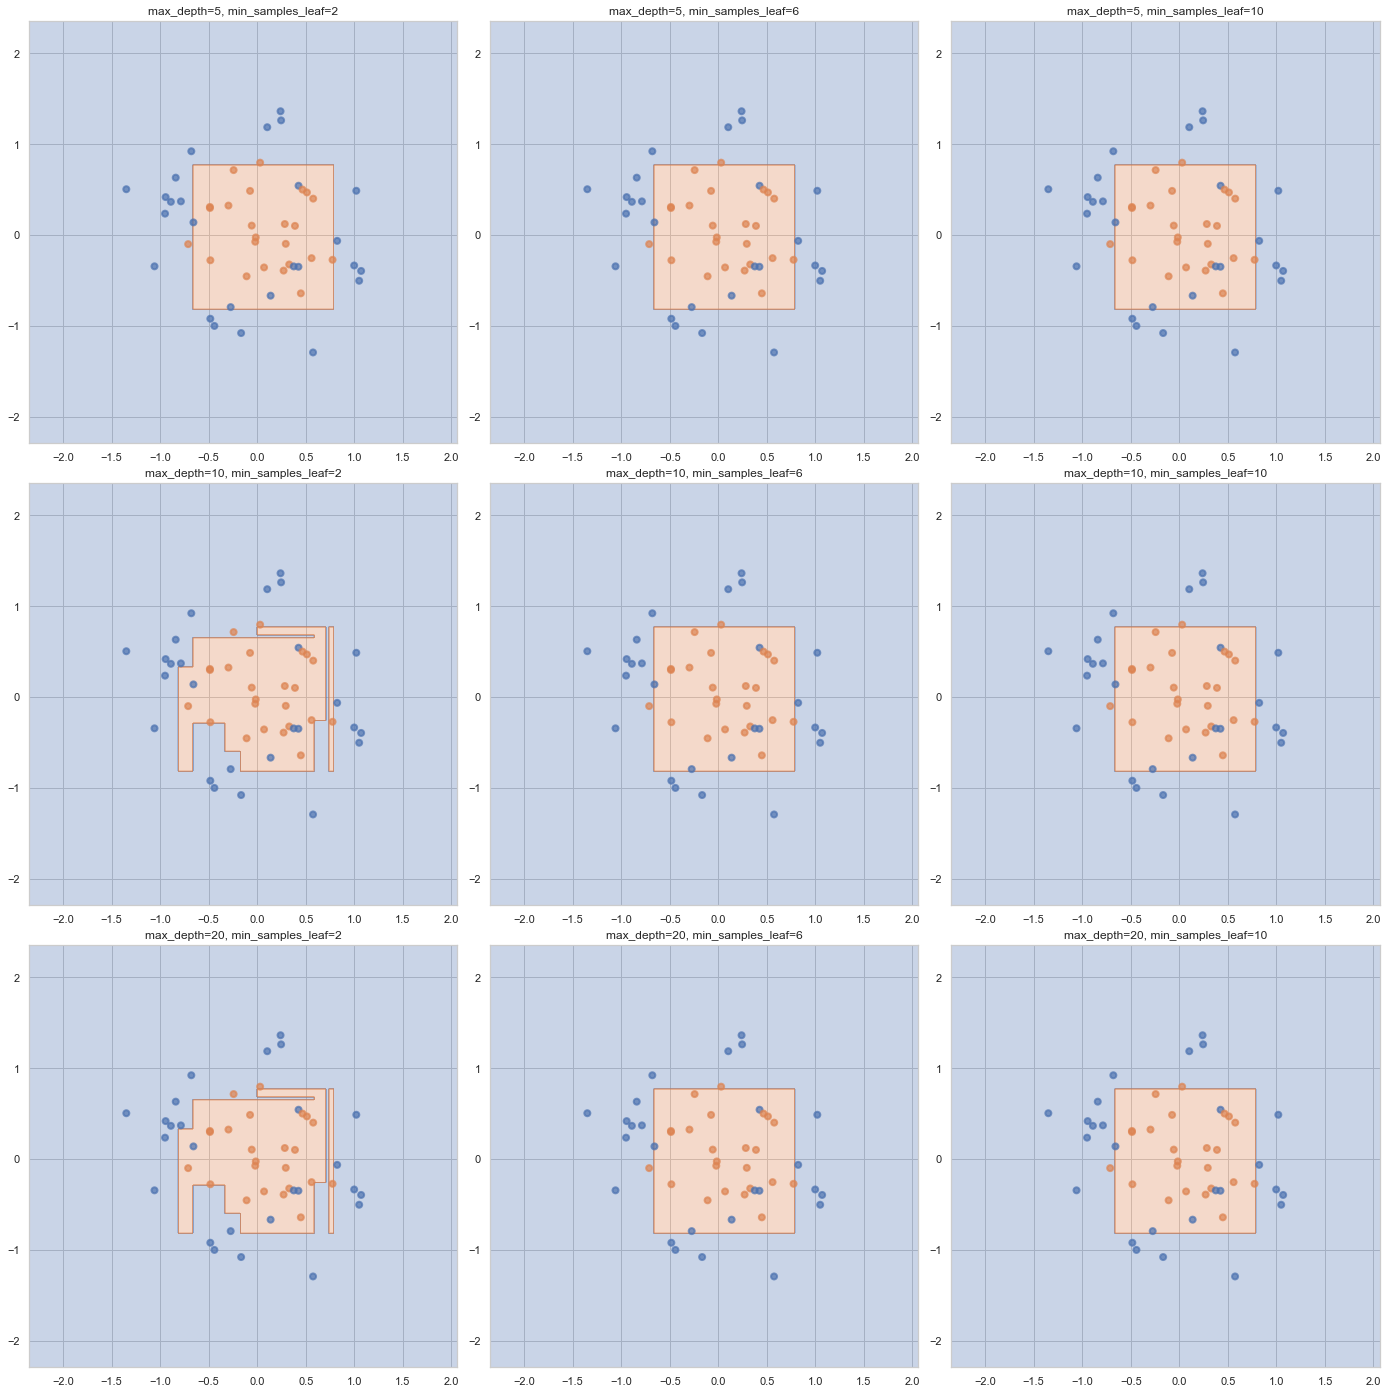

In [28]:
# для circles
def plot_surface_modified(clf, X, y, ax, depth, leaf):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    ax.set_title(f'max_depth={depth}, min_samples_leaf={leaf}')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)


from sklearn.model_selection import GridSearchCV

depths = [5, 10, 20]
leaves = [2, 6, 10]

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for i, depth in enumerate(depths):
    for j, leaf in enumerate(leaves):
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f'Accuracy = {accuracy_score(pred, y_test)}, max_depth = {depth}, min_samples_leaf = {leaf}')
        plot_surface_modified(clf, X_test, y_test, axs[i][j], depth, leaf)

__Ответ:__ Чем меньше min_samples_leaf, тем «подробнее» модель – разделяющая плоскость сильно подстраивается под тренировочную выборку; если посмотреть на accuracy при одинаковой max_depth и разных min_samples_leaf, она почти всегда будет больше у моделей, у которых min_samples_leaf минимальна. Изменение max_depth вообще не влияло на разделяющую плоскость – возможно, данные слишком простые или я перебрала недостаточно большие значения

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/43413/run-report/78728038/

In [90]:
%reload_ext autoreload
%autoreload 2

from hw5code import find_best_split


s = "0 1 1 1 2"
features = np.array(list(map(float, s.split())))
s1 = "0 0 0 1 1"
targets = np.array(list(map(float, s1.split())))

find_best_split(features, targets)

[1 3 1]
[0.5 1.5] [-0.4 -0.3] 1.5 -0.30000000000000004


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [91]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


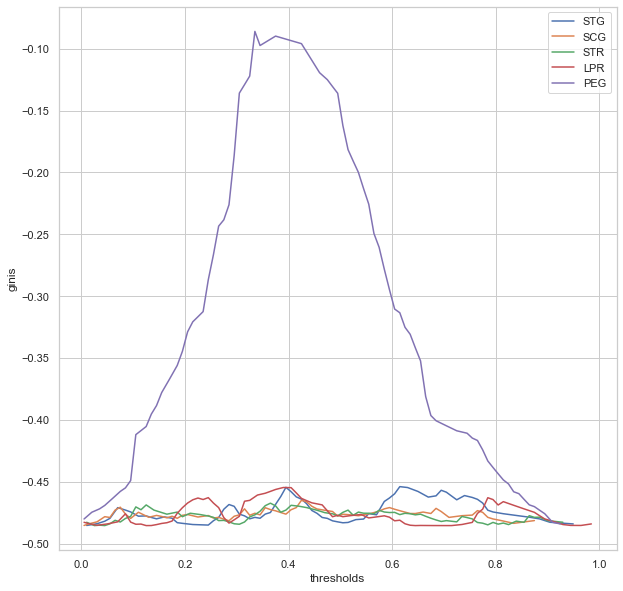

In [108]:
fig, axs = plt.subplots(figsize=(10, 10))
axs.set_xlabel('thresholds')
axs.set_ylabel('ginis')

for column in df.columns[:-1]:
    feature_vector, target_vector = df[column].to_numpy(), df['UNS'].to_numpy()
    t, g, best_t, best_g = find_best_split(feature_vector, target_vector)
    plt.plot(t, g, label=column)
plt.legend()
plt.show()

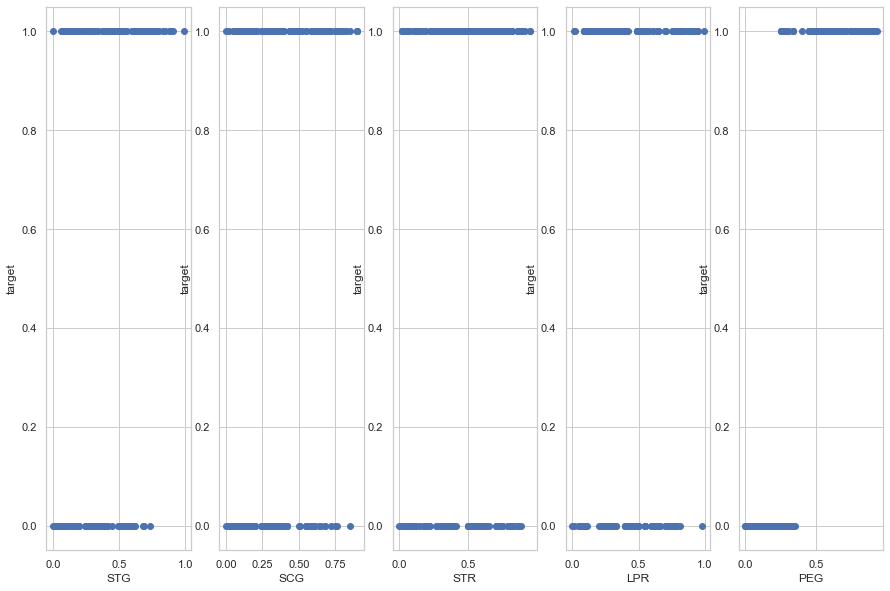

In [107]:
fig, axs = plt.subplots(1, 5, figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('target')
    axs[i].scatter(df[column], df['UNS'])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**  Производить деление выборки на два поддерева нужно по признаку PEG, потому что критерий Джини принимает наибольшее значение. если мы при этом посмотрим на scatter-графики, то увидим, что по признаку PEG выборка хорошо разделяется на два класса. Кривая для «хороших признаков» похожа на параболу ветвями вниз, кривая для признаков, по которым деление невозможно, похожа на горизонтальную линию с небольшими отклонениями в обе стороны

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
 
https://contest.yandex.ru/contest/43413/run-report/78727473/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [109]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

--2022-12-04 18:30:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data’

agaricus-lepiota.da 100%[===================>] 364,95K   363KB/s    in 1,0s    

2022-12-04 18:30:20 (363 KB/s) - ‘agaricus-lepiota.data’ saved [373704/373704]



In [111]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [163]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree
enc = OrdinalEncoder() # Саня сказал что применять LabelEncoder это легаси

mush_y = mushrooms['p']
mush_X = mushrooms.drop(columns='p')
mush_y[mush_y == 'e'] = 0
mush_y[mush_y == 'p'] = 1 # пусть хотим отличать ядовитые грибы

for col in mush_X.columns:
    mush_X.loc[:, col] = enc.fit_transform(mush_X[col].to_numpy().reshape(-1, 1))
    
mush_X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
1,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
2,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
3,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
4,5.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8119,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8120,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8121,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [176]:
tree = DecisionTree(feature_types=["categorical" for i in range(mush_X.shape[1])])
X_train, X_test, y_train, y_test = train_test_split(mush_X, mush_y, test_size=0.5, random_state=42)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
accuracy_score(pred.astype(int), y_test.to_numpy().astype(int))

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [195]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

result = pd.DataFrame()
result['Index'] = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
result.index = result['Index']
result = result.drop(columns='Index')

def eval_dataset(name, X, y):
    enc = OrdinalEncoder()
    tree_real = DecisionTree(feature_types=["real" for i in range(X.shape[1])])
    tree_cat = DecisionTree(feature_types=["categorical" for i in range(X.shape[1])])
    
#     pipeline_tree = Pipeline([
#         ('ohe', OneHotEncoder(sparse=False)),
#         ('tree', DecisionTree(feature_types=["real" for i in range(X.shape[1])])) # вот тут не столько категорий
#     ])
    
    X_encoded = OneHotEncoder(sparse=False).fit_transform(X)
    tree_ohe = DecisionTree(feature_types=["real" for i in range(X_encoded.shape[1])])
    
    
    tree_sklearn = DecisionTreeClassifier()
    
    acc_real = cross_val_score(tree_real, X.values, y.values.astype(int), scoring=make_scorer(accuracy_score), cv=10, error_score='raise')
    acc_cat = cross_val_score(tree_cat, X.values, y.values.astype(int), scoring=make_scorer(accuracy_score), cv=10, error_score='raise')
    acc_cat_enc = cross_val_score(tree_ohe, X_encoded, y.values.astype(int), scoring=make_scorer(accuracy_score), cv=10, error_score='raise')
    acc_sklearn = cross_val_score(tree_sklearn, X.values, y.values.astype(int), scoring=make_scorer(accuracy_score), cv=10, error_score='raise')
#     print(acc_real)
#     print(acc_cat)
#     print(acc_cat_enc)
    
    
    result.loc[name, 'real'] = acc_real.mean()
    result.loc[name, 'categorical'] = acc_cat.mean()
    result.loc[name, 'categorical+onehot'] = acc_cat_enc.mean()
    result.loc[name, 'sklearn'] = acc_sklearn.mean()
    

    
mushrooms = pd.read_csv('agaricus-lepiota.data')
mush_y = mushrooms['p']
mush_X = mushrooms.drop(columns='p')
mush_y[mush_y == 'e'] = 0
mush_y[mush_y == 'p'] = 1 # пусть хотим отличать ядовитые грибы

for col in mush_X.columns:
    mush_X.loc[:, col] = enc.fit_transform(mush_X[col].to_numpy().reshape(-1, 1))
eval_dataset('mushrooms', mush_X, mush_y)   
result

,real,categorical,categorical+onehot,sklearn
Index,,,,
mushrooms,0.999261,1.0,0.999631,0.95829
tic-tac-toe,NaN,NaN,NaN,NaN
cars,NaN,NaN,NaN,NaN
nursery,NaN,NaN,NaN,NaN


In [196]:
tic_tac_toe = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
tic_tac_toe_X = tic_tac_toe.drop(columns='positive')
tic_tac_toe_y = tic_tac_toe['positive']
tic_tac_toe_y[tic_tac_toe_y == 'positive'] = 1
tic_tac_toe_y[tic_tac_toe_y == 'negative'] = 0

for col in tic_tac_toe_X.columns:
    tic_tac_toe_X.loc[:, col] = enc.fit_transform(tic_tac_toe_X[col].to_numpy().reshape(-1, 1))
eval_dataset('tic-tac-toe', tic_tac_toe_X, tic_tac_toe_y) 

In [207]:
cars = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
cars_X = cars.drop(columns='unacc')
cars_y = cars['unacc']
cars_y[(cars_y == 'unacc') | (cars_y == 'acc')] = 0
cars_y[(cars_y == 'good') | (cars_y == 'vgood')] = 1

for col in cars_X.columns:
    cars_X.loc[:, col] = enc.fit_transform(cars_X[col].to_numpy().reshape(-1, 1))
eval_dataset('cars', cars_X, cars_y) 

In [210]:
nursery = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
# not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).
nursery_X = nursery.drop(columns='recommend')
nursery_y = nursery['recommend']
nursery_y[(nursery_y == 'not_recom') | (nursery_y == 'recommend')] = 0
nursery_y[(nursery_y == 'very_recom') | (nursery_y == 'priority') | (nursery_y == 'spec_prior')] = 1

for col in nursery_X.columns:
    nursery_X.loc[:, col] = enc.fit_transform(nursery_X[col].to_numpy().reshape(-1, 1))
eval_dataset('nursery', nursery_X, nursery_y) 

In [214]:
result

,real,categorical,categorical+onehot,sklearn
Index,,,,
mushrooms,0.999261,1.000000,0.999631,0.958290
tic-tac-toe,0.462697,0.549265,0.553520,0.776667
cars,0.942600,0.967519,0.921767,0.944371
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Лучшее качество получилось на mushrooms и nursery, при этом для mushrooms, cars и nursery получилось, что лучший результат показал самописный алгоритм. Для tic-tac-toe все вариации самописного алгоритма проявили себя сильно хуже, чем алгоритм из sklearn. Если посмотреть на данные (см. ниже), можно заметить, что в tic-tac-toe данные не перемешаны (по классам, сначала идут единички, потом нули), поэтому можно попробовать перемешать данные и посмотреть, влияет ли это на качество.

Кроме того, мы используем OrdinalEncoder, который сопоставляет значения признаков и числа от 1 до n, то есть задаёт какой-то линейный порядок, которого в оригинальных данных может и не быть, поэтому все предсказания categorical, лучше, чем предсказания real.

In [220]:
mushrooms.head(20)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,0,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,0,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,1,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,0,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,0,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [221]:
tic_tac_toe.head(20)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,1
1,x,x,x,x,o,o,o,o,x,1
2,x,x,x,x,o,o,o,b,b,1
3,x,x,x,x,o,o,b,o,b,1
4,x,x,x,x,o,o,b,b,o,1
5,x,x,x,x,o,b,o,o,b,1
6,x,x,x,x,o,b,o,b,o,1
7,x,x,x,x,o,b,b,o,o,1
8,x,x,x,x,b,o,o,o,b,1
9,x,x,x,x,b,o,o,b,o,1


In [222]:
cars.head(20)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0
5,vhigh,vhigh,2,2,big,low,0
6,vhigh,vhigh,2,2,big,med,0
7,vhigh,vhigh,2,2,big,high,0
8,vhigh,vhigh,2,4,small,low,0
9,vhigh,vhigh,2,4,small,med,0


In [223]:
nursery.head(20)

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0
5,usual,proper,complete,1,convenient,convenient,problematic,recommended,1
6,usual,proper,complete,1,convenient,convenient,problematic,priority,1
7,usual,proper,complete,1,convenient,convenient,problematic,not_recom,0
8,usual,proper,complete,1,convenient,inconv,nonprob,recommended,1
9,usual,proper,complete,1,convenient,inconv,nonprob,priority,1


In [224]:
tic_tac_toe = tic_tac_toe.sample(frac=1).reset_index(drop=True)
tic_tac_toe_X = tic_tac_toe.drop(columns='positive')
tic_tac_toe_y = tic_tac_toe['positive']
tic_tac_toe_y[tic_tac_toe_y == 'positive'] = 1
tic_tac_toe_y[tic_tac_toe_y == 'negative'] = 0

for col in tic_tac_toe_X.columns:
    tic_tac_toe_X.loc[:, col] = enc.fit_transform(tic_tac_toe_X[col].to_numpy().reshape(-1, 1))
eval_dataset('tic-tac-toe', tic_tac_toe_X, tic_tac_toe_y) 
result

,real,categorical,categorical+onehot,sklearn
Index,,,,
mushrooms,0.999261,1.000000,0.999631,0.958290
tic-tac-toe,0.883958,0.951930,0.952971,0.885022
cars,0.942600,0.967519,0.921767,0.944371
nursery,0.999846,0.999923,0.999769,0.999846


Видим, что качество действительно выросло!

Вставьте что угодно, описывающее ваши впечатления от этого задания: